# 2019 IMFS Data Science Competition - Netflix for Bonds
## Week4 Materials - Run your model and Submit your results

In this week 4 notebook, you will:

- Run your recommendation engine for the test CUSIPS for this competition
- Run your richness model to predict which bonds are rich or cheap
- Submit your results for grading
- Smile and be roiud of yoruself for completing this challenge!

**After this assignment you will be able to:**

- Recommend top 10 most similar bonds for a set of test CUSIPS
- Determine the rich and cheap bonds within your trading universe

We assume here that you have read the competition rules. If you have not, please go back to https://github.com/fintechsteve/imfs-datascience-comp/tree/master/Summer2019

We start with importing modules of interest:

In [1]:
import pandas as pd
import numpy as np
# import pickle
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

## 1.0 - Read in your dataset

Import the saved pickle file

In [2]:
df = pd.read_pickle('dataset/dataset_merge.pkl')
print("Head is: ----------")
print(df.head())
print("Tail is: ----------")
print(df.tail())

Head is: ----------
         BCLASS3        Country  Bid Spread  Cur Yld  G Spd  Years to Mat  \
0  Capital Goods    Switzerland        27.0     2.88   34.0          4.20   
1  Capital Goods    Switzerland       103.0     4.26  107.0         24.20   
2      Insurance  United States        74.0     3.87   60.0          3.97   
3      Insurance  United States        59.0     3.55   54.0          5.30   
4      Insurance  United States        82.0     3.58   66.0          6.72   

      OAS    OAD    Amt Out    Cpn     ...      KRD 2Y KRD 5Y KRD 10Y KRD 20Y  \
0   33.65   3.91  1250000.0  2.875     ...        1.06   2.86    0.00    0.00   
1  108.01  15.04   750000.0  4.375     ...        0.06   0.23    0.75    8.52   
2   59.67   3.68   350000.0  4.000     ...        1.29   2.38    0.00    0.00   
3   53.56   4.80   700000.0  3.625     ...        0.05   4.46    0.28    0.00   
4   65.13   5.92   750000.0  3.625     ...        0.04   3.88    1.99    0.00   

  KRD 30Y  S&P Rating Num  Acc

In [3]:
print("columns are: ----------")
print(df.columns)

columns are: ----------
Index(['BCLASS3', 'Country', 'Bid Spread', 'Cur Yld', 'G Spd', 'Years to Mat',
       'OAS', 'OAD', 'Amt Out', 'Cpn', 'Excess Rtn', 'ISIN', 'Ticker', 'Mty',
       'Iss Dt', 'Px Close', 'KRD 6M', 'KRD 2Y', 'KRD 5Y', 'KRD 10Y',
       'KRD 20Y', 'KRD 30Y', 'S&P Rating Num', 'Accrued Int (%)',
       'Yield to Mat', 'Class - Detail - Code', 'date'],
      dtype='object')


## 1.a - Run dimensionality reduction

This step is optional but helpful in normalizing your dataset for a better prediction.  

You will normalize your dataset then apply the principal component analysis, which is a method that maximizes variance to uncover which components in your dataset have the highest impact to the overall variance of your dataset.  

Because the PCA projects your data into directions that maximize variance, you need to normalize your dataset before applying PCA; otherwise, the PCA will favor variables with the larger variance.  

Below, we replicate the code you applied in step 2.0 of week0.ipynb.

In [5]:
# get the average stats for each cusip, you can group by different attribute to see different visualization
ave_df = df.groupby('Cpn').mean()
# fill the na, there are many different ways to fill na, 
# you can try different one to see how does them affect your result
ave_df = ave_df.fillna(ave_df.mean())
# we are doing a  StandardScaler here, similarly, there are different ways to scale data
# please feel free to try other methods
train_x = StandardScaler().fit_transform(ave_df)
# apply pca to dataset
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(train_x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
# we can have a look at the dataset now
principalDf.head(5)

,principal component 1,principal component 2,principal component 3
0,-5.262594,1.031182,1.350632
1,-5.813801,1.661013,1.122304
2,-5.796228,1.953139,1.470411
3,-4.858668,0.528777,1.551973
4,-4.924218,0.788218,1.182522


/Users/eunicehameyie/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


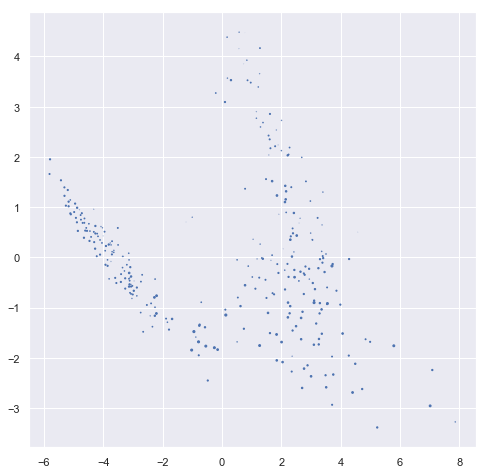

In [6]:
# plot the dataset here
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
x1 = principalDf['principal component 1']
x2 = principalDf['principal component 2']
x3 = principalDf['principal component 3']
ax.scatter(x1, x2, x3)

## 1.1b - Use euclidean distance

In this step, we cluster dataset based on Euclidean distance.

## 1.1c - Use cosine similarity

In this step, we cluster dataset based on cosine similarity.

## 1.1d - Use knn

In this step, we cluster dataset based on KNN algorithm.

## 2.0 - Run a recommendation

Test your recommendation algorithm and rank the following CUSIPS: US00037BAB80, US00037BAC63 and US001055AJ19.
You'd want to list the top 10 answers from closest to least close.